In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
 
pd.set_option('display.max_columns', None) 
plt.rcParams['figure.figsize'] = (12,6) 

In [3]:
import pandas as pd

data = pd.read_csv("Phishing_Legitimate_full.csv")

# Convert float64 → float32
float_cols = data.select_dtypes('float64').columns
for c in float_cols:
    data[c] = data[c].astype('float32')

# Convert int64 → int32
int_cols = data.select_dtypes('int64').columns
for c in int_cols:
    data[c] = data[c].astype('int32')

data.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   id                                  10000 non-null  int32  
 1   NumDots                             10000 non-null  int32  
 2   SubdomainLevel                      10000 non-null  int32  
 3   PathLevel                           10000 non-null  int32  
 4   UrlLength                           10000 non-null  int32  
 5   NumDash                             10000 non-null  int32  
 6   NumDashInHostname                   10000 non-null  int32  
 7   AtSymbol                            10000 non-null  int32  
 8   TildeSymbol                         10000 non-null  int32  
 9   NumUnderscore                       10000 non-null  int32  
 10  NumPercent                          10000 non-null  int32  
 11  NumQueryComponents                  10000 

In [4]:
data.rename(columns={'CLASS_LABEL': 'labels'}, inplace=True) 
data.sample(5) 


,id,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,NumPercent,NumQueryComponents,NumAmpersand,NumHash,NumNumericChars,NoHttps,RandomString,IpAddress,DomainInSubdomains,DomainInPaths,HttpsInHostname,HostnameLength,PathLength,QueryLength,DoubleSlashInPath,NumSensitiveWords,EmbeddedBrandName,PctExtHyperlinks,PctExtResourceUrls,ExtFavicon,InsecureForms,RelativeFormAction,ExtFormAction,AbnormalFormAction,PctNullSelfRedirectHyperlinks,FrequentDomainNameMismatch,FakeLinkInStatusBar,RightClickDisabled,PopUpWindow,SubmitInfoToEmail,IframeOrFrame,MissingTitle,ImagesOnlyInForm,SubdomainLevelRT,UrlLengthRT,PctExtResourceUrlsRT,AbnormalExtFormActionR,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT,labels
9096,9097,2,1,1,41,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,22,12,0,0,0,0,0.470588,0.538462,0,1,1,1,0,0.000000,0,0,0,0,0,1,0,0,1,1,-1,0,0,0,0
5228,5229,2,1,6,95,0,0,0,0,8,0,0,0,0,8,1,1,0,0,1,0,14,74,0,0,0,0,0.135593,0.748201,0,1,1,1,1,0.644068,0,0,0,0,0,1,0,0,1,-1,-1,-1,0,-1,0
1928,1929,2,0,4,52,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,17,28,0,0,0,0,0.923077,1.000000,0,1,0,0,0,0.000000,1,0,0,0,0,0,0,0,1,1,1,1,-1,-1,1
2096,2097,2,0,5,67,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,11,49,0,0,0,1,0.000000,0.000000,0,1,1,0,0,0.000000,0,0,0,0,0,0,0,0,1,0,1,1,1,1,1
2625,2626,5,1,3,46,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,17,22,0,0,0,0,0.000000,0.000000,0,0,0,0,0,0.200000,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1


In [5]:
data.describe() 

,id,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,NumPercent,NumQueryComponents,NumAmpersand,NumHash,NumNumericChars,NoHttps,RandomString,IpAddress,DomainInSubdomains,DomainInPaths,HttpsInHostname,HostnameLength,PathLength,QueryLength,DoubleSlashInPath,NumSensitiveWords,EmbeddedBrandName,PctExtHyperlinks,PctExtResourceUrls,ExtFavicon,InsecureForms,RelativeFormAction,ExtFormAction,AbnormalFormAction,PctNullSelfRedirectHyperlinks,FrequentDomainNameMismatch,FakeLinkInStatusBar,RightClickDisabled,PopUpWindow,SubmitInfoToEmail,IframeOrFrame,MissingTitle,ImagesOnlyInForm,SubdomainLevelRT,UrlLengthRT,PctExtResourceUrlsRT,AbnormalExtFormActionR,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT,labels
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.0,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,2.445100,0.586800,3.300300,70.264100,1.818000,0.138900,0.000300,0.013100,0.32320,0.073800,0.458600,0.277200,0.002300,5.810300,0.988800,0.52520,0.017200,0.022200,0.428900,0.0,18.82430,35.564900,8.606500,0.000900,0.109300,0.057100,0.241334,0.392932,0.167200,0.844000,0.248700,0.1018,0.057600,0.136136,0.215300,0.005500,0.014000,0.004900,0.128800,0.339600,0.03220,0.030400,0.956600,0.020200,0.353300,0.793200,0.173400,0.314100,0.500000
std,2886.89568,1.346836,0.751214,1.863241,33.369877,3.106258,0.545744,0.017319,0.113709,1.11466,0.622248,1.344793,1.117356,0.047906,9.617877,0.105241,0.49939,0.130023,0.147341,0.494944,0.0,8.11654,24.588502,24.313053,0.029988,0.368737,0.232045,0.342363,0.387295,0.373173,0.362873,0.432281,0.3024,0.232997,0.312426,0.411051,0.073961,0.117496,0.069832,0.334995,0.473597,0.17654,0.171694,0.248037,0.820036,0.888908,0.521019,0.755771,0.897843,0.500025
min,1.00000,1.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.0,4.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
25%,2500.75000,2.000000,0.000000,2.000000,48.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.0,14.00000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.030303,0.000000,1.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,-1.000000,-1.000000,1.000000,0.000000,-1.000000,0.000000
50%,5000.50000,2.000000,1.000000,3.000000,62.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,1.00000,0.000000,0.000000,0.000000,0.0,18.00000,30.000000,0.000000,0.000000,0.000000,0.000000,0.071429,0.247511,0.000000,1.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.500000
75%,7500.25000,3.000000,1.000000,4.000000,84.000000,2.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,8.000000,1.000000,1.00000,0.000000,0.000000,1.000000,0.0,22.00000,48.000000,0.000000,0.000000,0.000000,0.000000,0.315874,0.785714,0.000000,1.000000,0.000000,0.0000,0.000000,0.047619,0.000000,0.000000,0.000000,0.000

<Axes: xlabel='labels'>

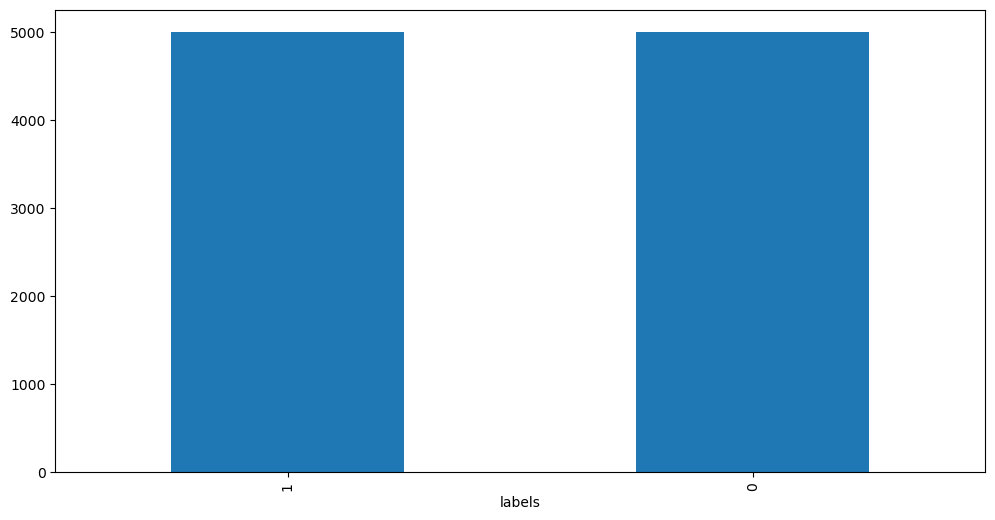

In [6]:
data['labels'].value_counts().plot(kind='bar')  


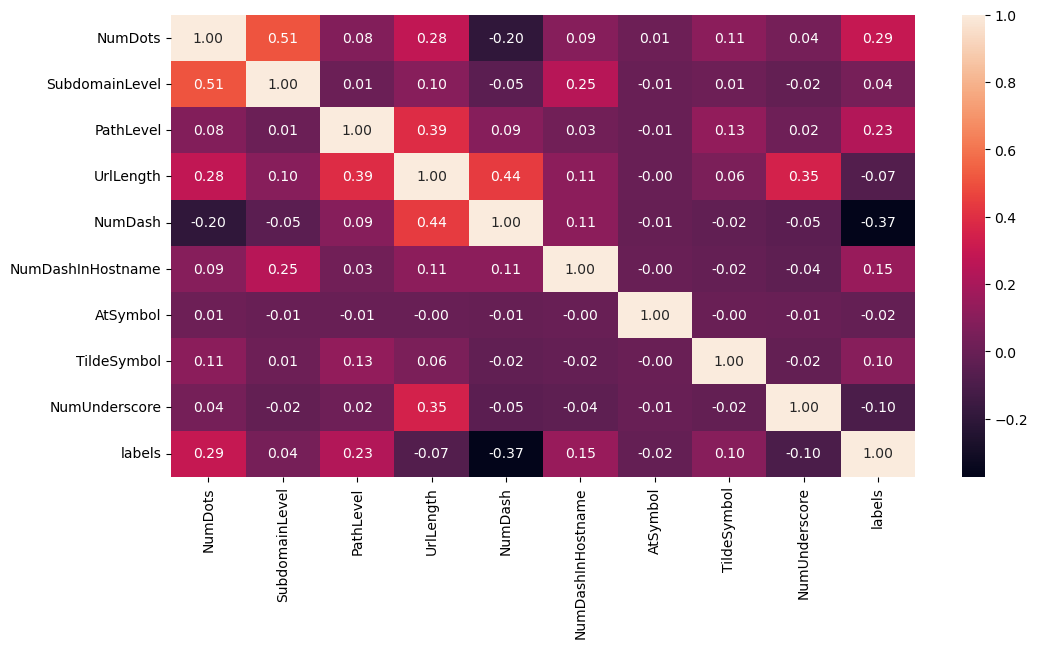

In [7]:
def corr_heatmap(data, idx_s, idx_e): 
    y = data['labels'] 
    temp = data.iloc[:, idx_s:idx_e] 
    if 'id' in temp.columns: 
        del temp['id'] 
    temp['labels'] = y 
    sns.heatmap(temp.corr(), annot=True, fmt='.2f') 
    plt.show() 
 
corr_heatmap(data, 0, 10) 

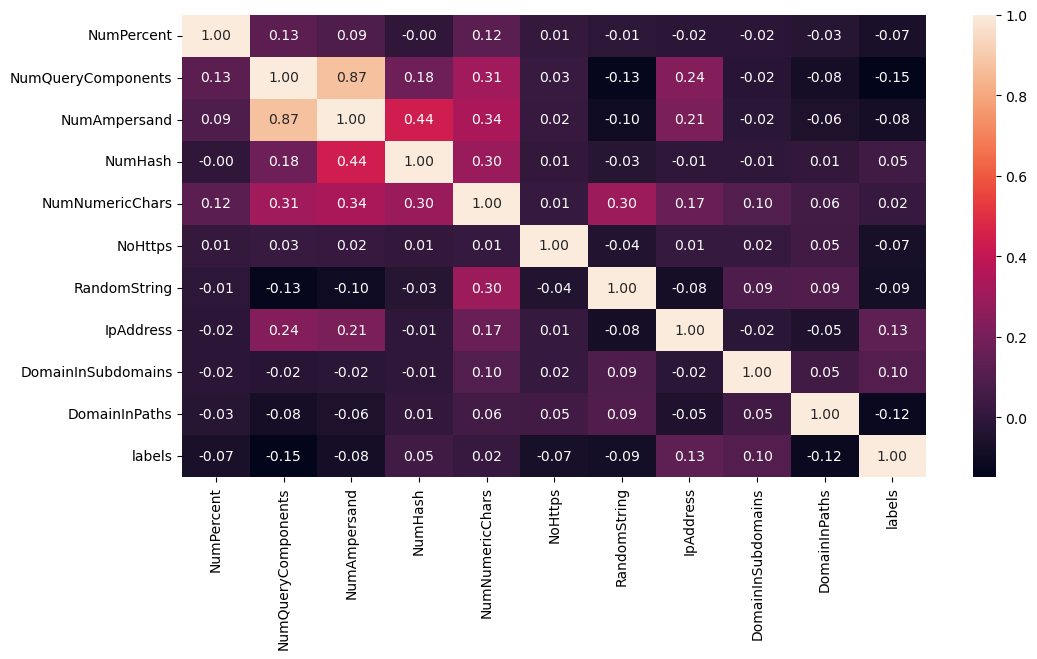

In [8]:
corr_heatmap(data, 10, 20) 

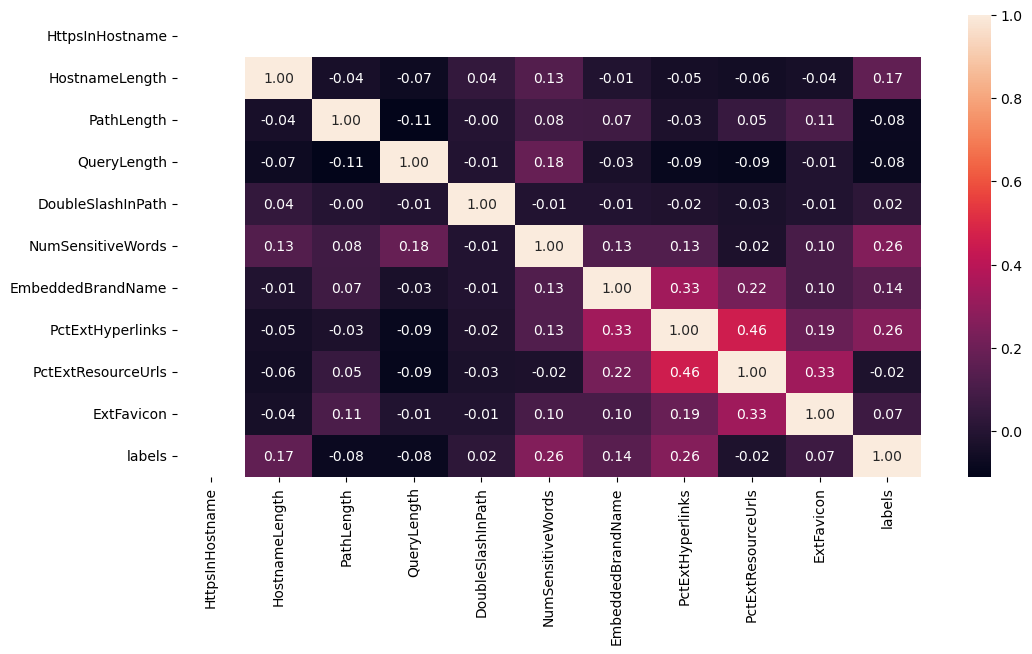

In [9]:
corr_heatmap(data, 20, 30) 

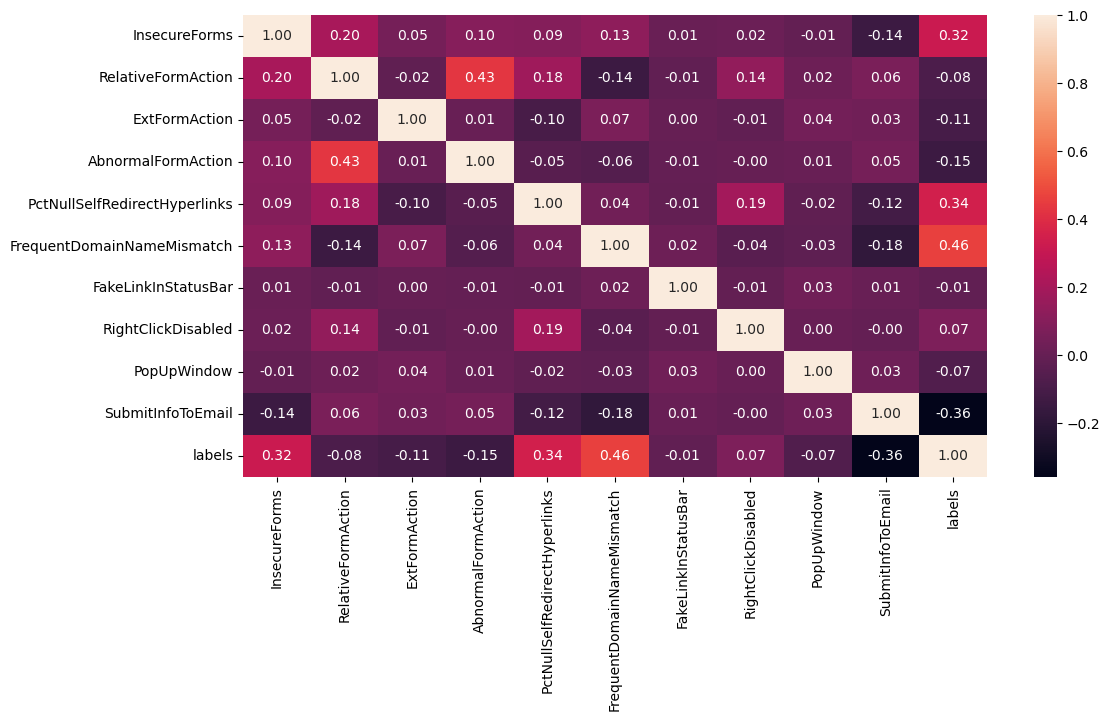

In [10]:
corr_heatmap(data, 30, 40) 

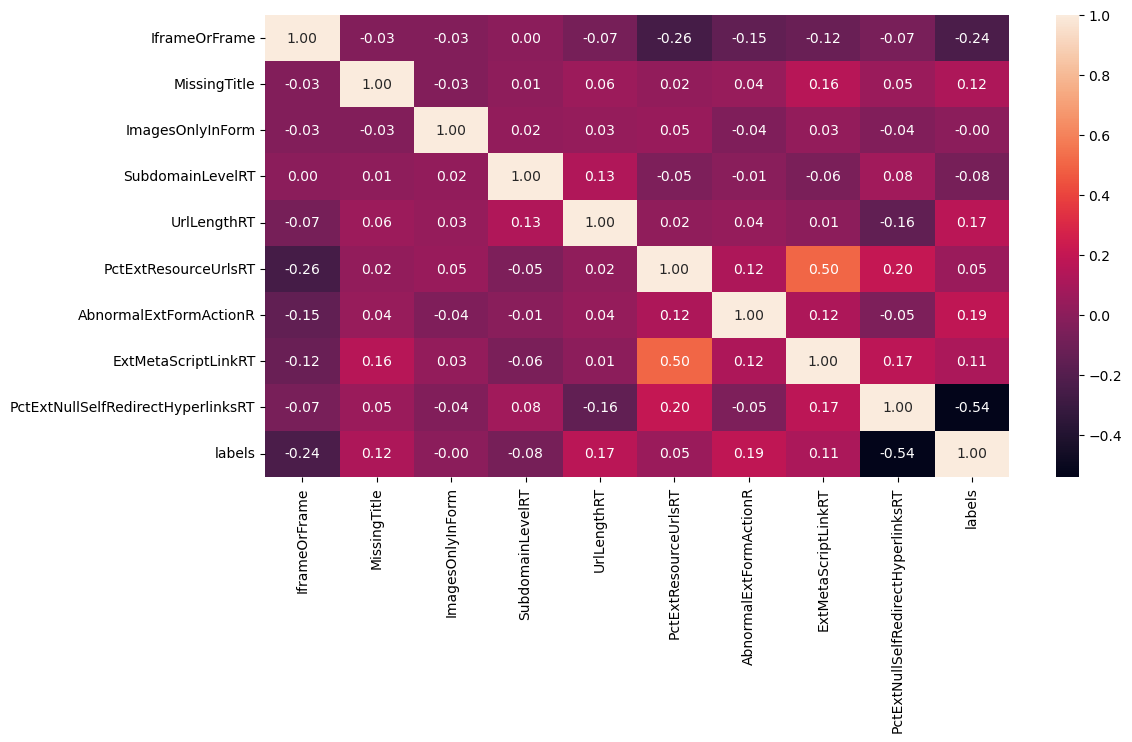

In [11]:

corr_heatmap(data, 40, 50)

In [12]:
from sklearn.feature_selection import mutual_info_classif 
X = data.drop(['id', 'labels'], axis=1) 
y = data['labels'] 
discrete_features = X.dtypes == int 
mi_scores = mutual_info_classif(X, y, discrete_features=discrete_features) 
mi_scores = pd.Series(mi_scores, name='MI Scores', index=X.columns) 
mi_scores = mi_scores.sort_values(ascending=False) 
mi_scores 


PctExtHyperlinks                      4.693938e-01
PctExtResourceUrls                    2.930577e-01
PctNullSelfRedirectHyperlinks         2.329060e-01
PctExtNullSelfRedirectHyperlinksRT    2.123850e-01
NumNumericChars                       1.326711e-01
FrequentDomainNameMismatch            1.254908e-01
ExtMetaScriptLinkRT                   1.175434e-01
NumDash                               1.140136e-01
SubmitInfoToEmail                     7.802617e-02
NumDots                               6.553700e-02
PathLength                            6.413269e-02
QueryLength                           5.818557e-02
PathLevel                             5.543887e-02
InsecureForms                         5.508096e-02
UrlLength                             5.263855e-02
NumSensitiveWords                     4.180522e-02
NumQueryComponents                    3.361768e-02
PctExtResourceUrlsRT                  2.831059e-02
IframeOrFrame                         2.805496e-02
HostnameLength                 

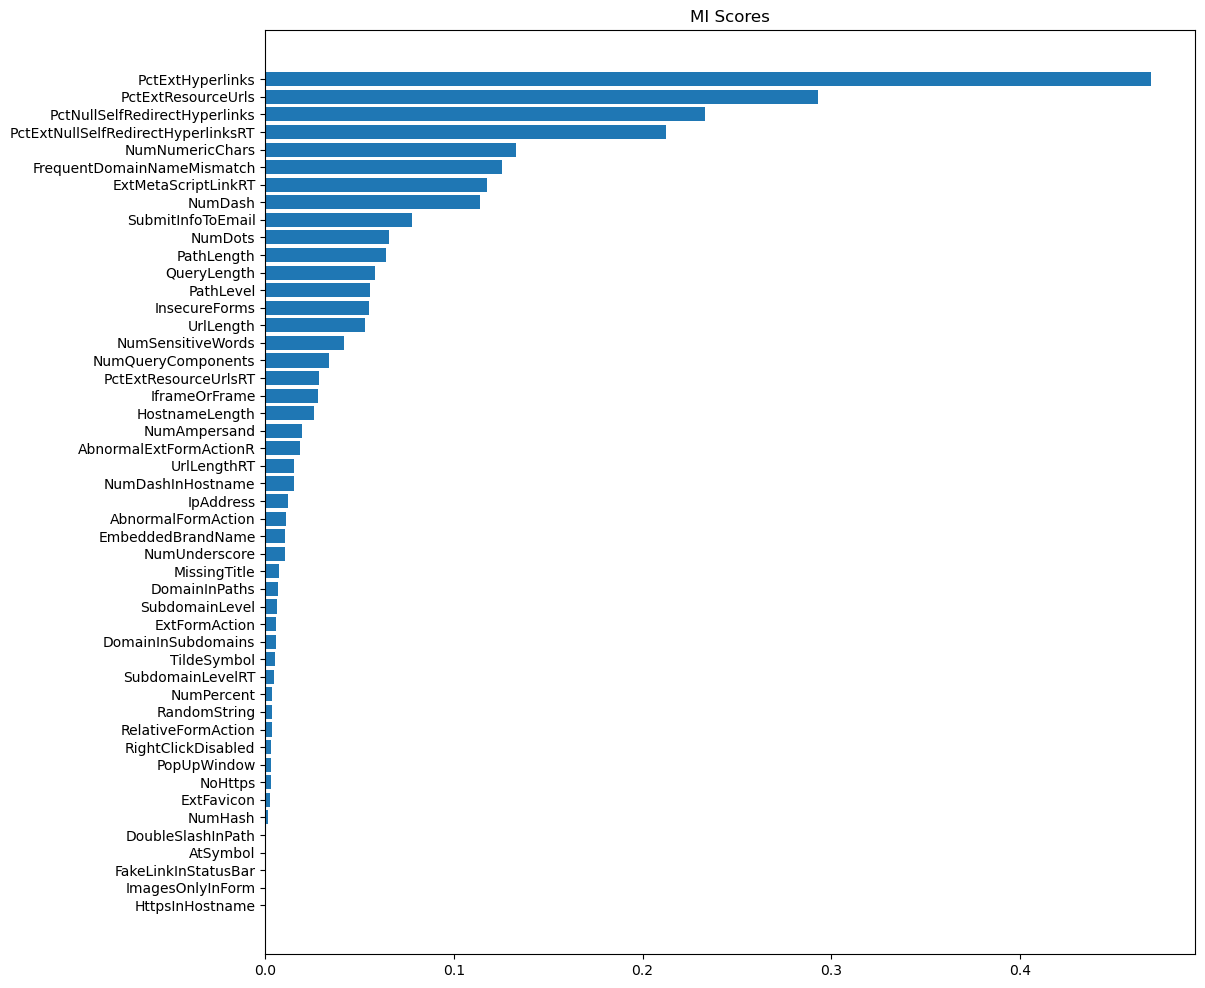

In [13]:
import numpy as np
import matplotlib.pyplot as plt

def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("MI Scores")

plt.figure(dpi=100, figsize=(12, 12))
plot_mi_scores(mi_scores)


In [14]:
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score 

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

def train_logistic(data, top_n):
    top_n_features = mi_scores.sort_values(ascending=False).head(top_n).index.tolist()
    X = data[top_n_features]
    y = data['labels']
    
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, shuffle=True
    )
    
    lr = LogisticRegression(max_iter=10000)
    lr.fit(X_train, y_train)
    
    y_pred = lr.predict(X_test)
    
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    
    return precision, recall, f1, accuracy


In [19]:
arr = []

for i in range(20, 51, 1):
    precision, recall, f1, accuracy = train_logistic(data, i)
    print(
        "Performance for Logistic Model with Top {} features is precision: {:.4f}, recall: {:.4f}, f1 score: {:.4f}, accuracy: {:.4f}".format(
            i, precision, recall, f1, accuracy
        )
    )
    arr.append([i, precision, recall, f1, accuracy])


Performance for Logistic Model with Top 20 features is precision: 0.9131, recall: 0.9385, f1 score: 0.9256, accuracy: 0.9215
Performance for Logistic Model with Top 21 features is precision: 0.9094, recall: 0.9378, f1 score: 0.9234, accuracy: 0.9225
Performance for Logistic Model with Top 22 features is precision: 0.9103, recall: 0.9356, f1 score: 0.9228, accuracy: 0.9210
Performance for Logistic Model with Top 23 features is precision: 0.9204, recall: 0.9305, f1 score: 0.9254, accuracy: 0.9245
Performance for Logistic Model with Top 24 features is precision: 0.9333, recall: 0.9297, f1 score: 0.9315, accuracy: 0.9280
Performance for Logistic Model with Top 25 features is precision: 0.9278, recall: 0.9213, f1 score: 0.9246, accuracy: 0.9255
Performance for Logistic Model with Top 26 features is precision: 0.9177, recall: 0.9484, f1 score: 0.9328, accuracy: 0.9325
Performance for Logistic Model with Top 27 features is precision: 0.9196, recall: 0.9537, f1 score: 0.9364, accuracy: 0.9370


In [20]:
df = pd.DataFrame(arr, columns=['num_of_features', 'precision', 'recall', 'f1_score', 'accuracy']) 
df 

,num_of_features,precision,recall,f1_score,accuracy
0,20,0.913084,0.938521,0.925628,0.9215
1,21,0.909445,0.937751,0.923381,0.9225
2,22,0.910318,0.935580,0.922776,0.9210
3,23,0.920432,0.930487,0.925432,0.9245
4,24,0.933270,0.929725,0.931494,0.9280
5,25,0.927846,0.921292,0.924557,0.9255
6,26,0.917728,0.948381,0.932802,0.9325
7,27,0.919643,0.953704,0.936364,0.9370
8,28,0.918489,0.944785,0.931452,0.9320
9,29,0.932673,0.943888,0.938247,0.9380


<Axes: xlabel='num_of_features', ylabel='precision'>

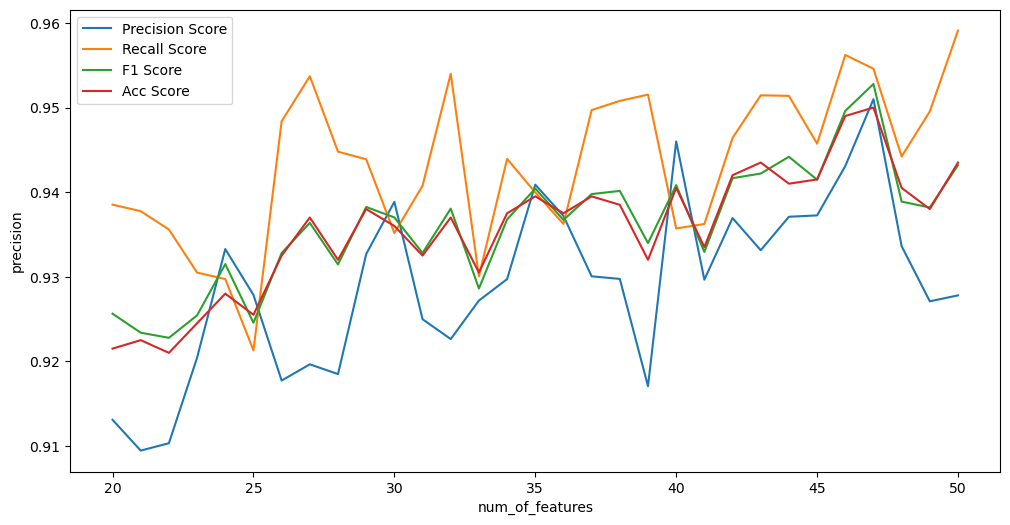

In [21]:
sns.lineplot(x='num_of_features', y='precision', data=df, label='Precision Score') 
sns.lineplot(x='num_of_features', y='recall', data=df, label='Recall Score')  
sns.lineplot(x='num_of_features', y='f1_score', data=df, label='F1 Score') 
sns.lineplot(x='num_of_features', y='accuracy', data=df, label='Acc Score')

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

def train_rfc(data, top_n):
    top_n_features = mi_scores.sort_values(ascending=False).head(top_n).index.tolist()
    X = data[top_n_features]
    y = data['labels']
    
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, shuffle=True
    )
    
    rfc = RandomForestClassifier(
        n_estimators=500,
        max_depth=32,
        max_features=1.0
    )
    
    rfc.fit(X_train, y_train)
    y_pred = rfc.predict(X_test)
    
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    
    return precision, recall, f1, accuracy


In [23]:
arr = []

for i in range(20, 51, 1):
    precision, recall, f1, accuracy = train_rfc(data, i)
    print(
        "Performance for RFC Model with Top {} features is precision: {:.4f}, recall: {:.4f}, f1 score: {:.4f}, accuracy: {:.4f}".format(
            i, precision, recall, f1, accuracy
        )
    )
    arr.append([i, precision, recall, f1, accuracy])


Performance for RFC Model with Top 20 features is precision: 0.9721, recall: 0.9711, f1 score: 0.9716, accuracy: 0.9725
Performance for RFC Model with Top 21 features is precision: 0.9811, recall: 0.9734, f1 score: 0.9773, accuracy: 0.9770
Performance for RFC Model with Top 22 features is precision: 0.9696, recall: 0.9812, f1 score: 0.9753, accuracy: 0.9750
Performance for RFC Model with Top 23 features is precision: 0.9631, recall: 0.9735, f1 score: 0.9682, accuracy: 0.9675
Performance for RFC Model with Top 24 features is precision: 0.9791, recall: 0.9694, f1 score: 0.9742, accuracy: 0.9740
Performance for RFC Model with Top 25 features is precision: 0.9778, recall: 0.9818, f1 score: 0.9798, accuracy: 0.9800
Performance for RFC Model with Top 26 features is precision: 0.9679, recall: 0.9837, f1 score: 0.9758, accuracy: 0.9760
Performance for RFC Model with Top 27 features is precision: 0.9739, recall: 0.9690, f1 score: 0.9715, accuracy: 0.9715
Performance for RFC Model with Top 28 fe

<Axes: xlabel='num_of_features', ylabel='precision'>

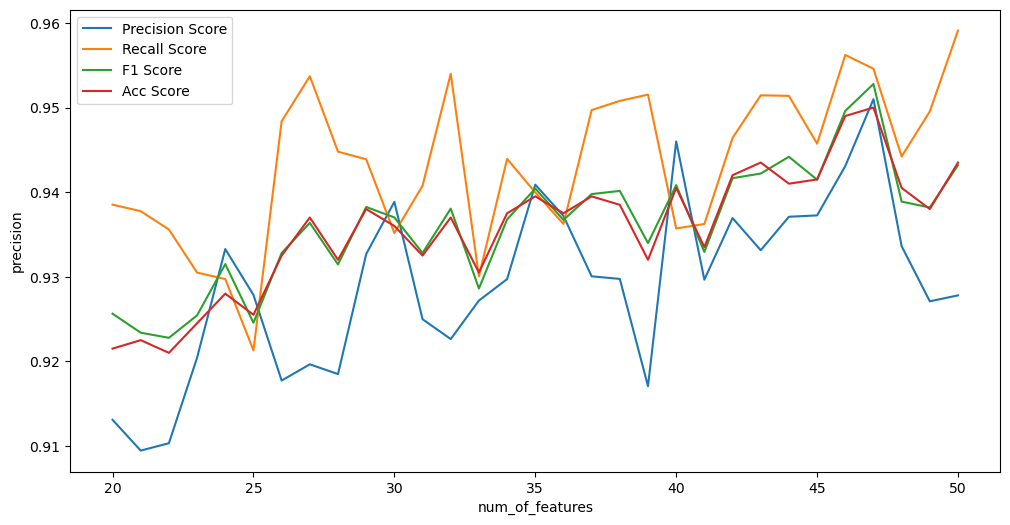

In [24]:
sns.lineplot(x='num_of_features', y='precision', data=df, label='Precision Score') 
sns.lineplot(x='num_of_features', y='recall', data=df, label='Recall Score') 
sns.lineplot(x='num_of_features', y='f1_score', data=df, label='F1 Score') 
sns.lineplot(x='num_of_features', y='accuracy', data=df, label='Acc Score') 


In [26]:
top_n_features = mi_scores.sort_values(ascending=False).head(32).index.tolist()
X = data[top_n_features]
y = data['labels']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=True
)

rfc = RandomForestClassifier(
    n_estimators=500,
    max_depth=32,
    max_features=1.0
)

rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print(
    "Performance for RFC Model with Top {} features is precision: {:.4f}, recall: {:.4f}, f1 score: {:.4f}, accuracy: {:.4f}".format(
        32, precision, recall, f1, accuracy
    )
)


Performance for RFC Model with Top 32 features is precision: 0.9722, recall: 0.9731, f1 score: 0.9727, accuracy: 0.9725


In [27]:
from sklearn.metrics import classification_report 
print(classification_report(y_test, y_pred)) 

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       995
           1       0.97      0.97      0.97      1005

    accuracy                           0.97      2000
   macro avg       0.97      0.97      0.97      2000
weighted avg       0.97      0.97      0.97      2000

